In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
DATA_PATH = "dataset"
DATA_FILE = "data.csv"
data = pd.read_csv(os.path.join(DATA_PATH, DATA_FILE))
N = data.shape[0]

In [3]:
print(data.shape)

(75000, 6)


In [4]:
data.head(3)

,duration1,duration2,temperature,Humidity,Direction,Velocity
0,573,563,26.9,64.8,0,19.1
1,596,561,26.9,64.8,0,19.1
2,579,557,26.9,64.6,0,19.1


In [5]:
data.describe()

,duration1,duration2,temperature,Humidity,Direction,Velocity
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,571.724493,562.643373,27.069213,60.487608,180.000000,15.833333
std,9.890638,7.649569,0.702894,4.552666,108.167259,2.901264
min,557.000000,529.000000,25.100000,51.800000,0.000000,12.050000
25%,566.000000,559.000000,26.900000,57.100000,90.000000,12.050000
50%,570.000000,563.000000,27.300000,60.300000,180.000000,16.350000
75%,574.000000,566.000000,27.600000,63.600000,270.000000,19.100000
max,605.000000,598.000000,28.000000,72.600000,360.000000,19.100000


## Target variable Direction 

Text(0, 0.5, 'Angle')

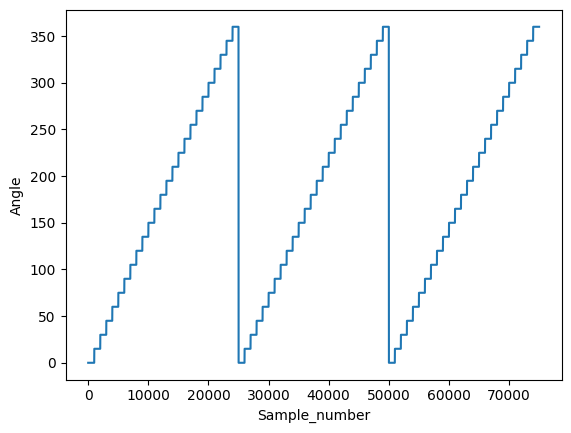

In [6]:
plt.plot(data["Direction"])
plt.xlabel("Sample_number")
plt.ylabel("Angle")

## Target variable Velocity

Text(0, 0.5, 'Velocity')

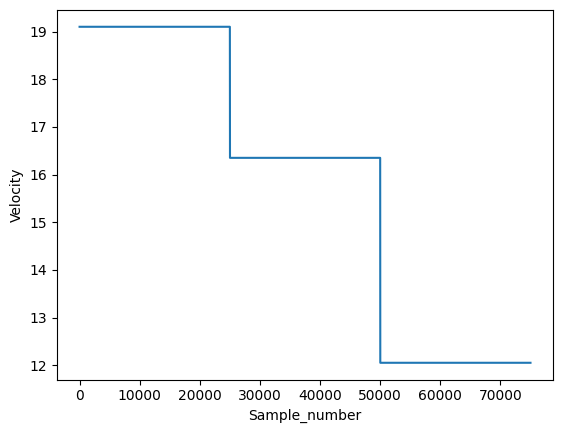

In [7]:
plt.plot(data["Velocity"])
plt.xlabel("Sample_number")
plt.ylabel("Velocity")

## Temparature

Text(0, 0.5, 'Temperature')

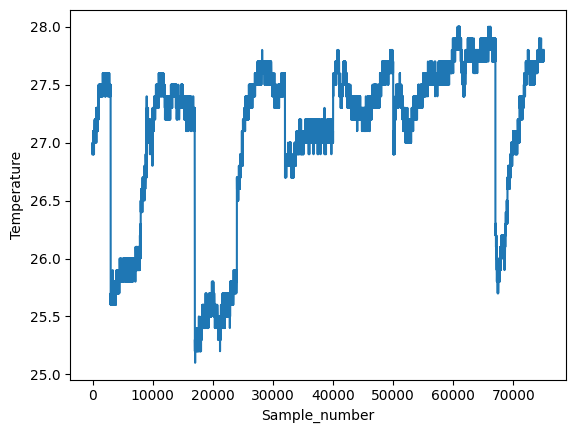

In [8]:
plt.plot(data["temperature"])
plt.xlabel("Sample_number")
plt.ylabel("Temperature")

## Humidity

Text(0, 0.5, 'Humidity')

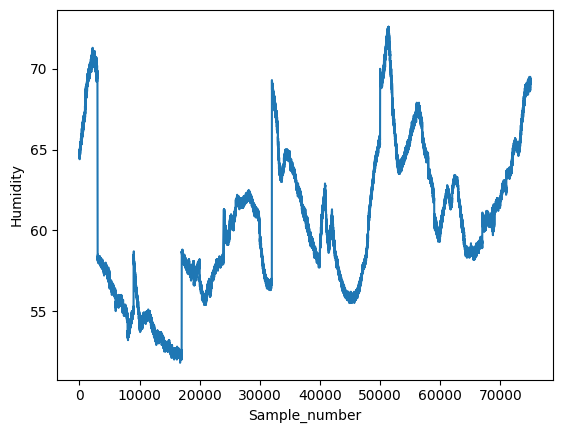

In [9]:
plt.plot(data["Humidity"])
plt.xlabel("Sample_number")
plt.ylabel("Humidity")

## Correlation Table

In [10]:
data.corr(method='spearman')

,duration1,duration2,temperature,Humidity,Direction,Velocity
duration1,1.000000,-0.031308,-0.107249,0.221167,0.024808,-0.001337
duration2,-0.031308,1.000000,-0.010481,0.142051,-0.509224,0.056722
temperature,-0.107249,-0.010481,1.000000,0.340958,-0.062549,-0.541012
Humidity,0.221167,0.142051,0.340958,1.000000,-0.272416,-0.612456
Direction,0.024808,-0.509224,-0.062549,-0.272416,1.000000,0.000000
Velocity,-0.001337,0.056722,-0.541012,-0.612456,0.000000,1.000000


Text(0, 0.5, 'duration1')

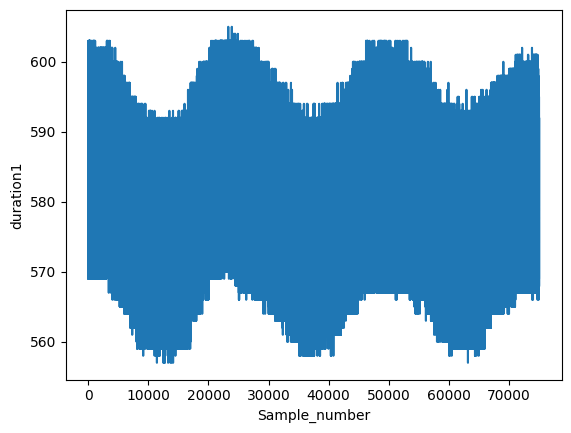

In [11]:
plt.plot(data["duration1"])
plt.xlabel("Sample_number")
plt.ylabel("duration1")

Text(0, 0.5, 'duration2')

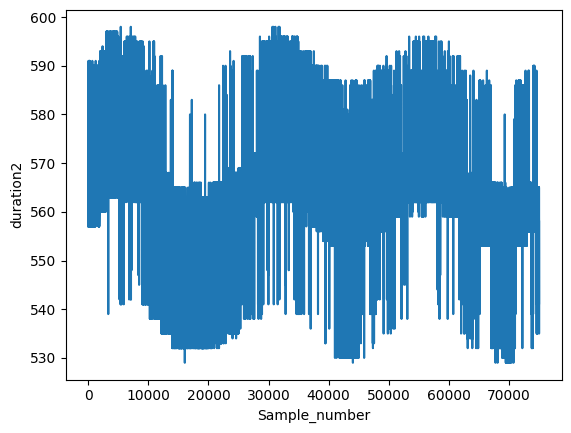

In [12]:
plt.plot(data["duration2"])
plt.xlabel("Sample_number")
plt.ylabel("duration2")

## Phase Shift Plots

In [13]:
def phase_plots(d1, d2, v, start, stop):
    plt.rcParams["figure.figsize"] = (12,4)
    plt.plot(indx[start:stop], d1[start:stop],c="b", label="duration1")
    plt.plot(indx[start:stop], d2[start:stop],c="k", label="duration2")
    plt.plot(indx[start:stop], v[start:stop],c="m", label="velocity")
    plt.xlabel("samples")
    plt.ylabel("duration")
    plt.legend()

In [14]:
d1 = data["duration1"]
d2 = data["duration2"]
v = data["Velocity"]
indx = range(N)
start = 24750
stop = 25250

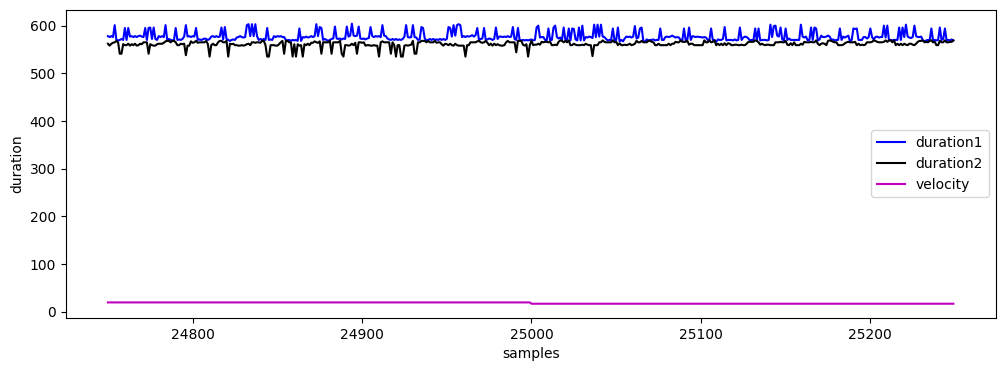

In [15]:
phase_plots(d1, d2, v, start, stop)

In [17]:
data["delta"] = data["duration1"]-data["duration2"]

In [18]:
durations = data[["duration1", "duration2", "delta", "Velocity"]]
scaler = MinMaxScaler()
scaler.fit(durations)
dnorms = scaler.transform(durations)

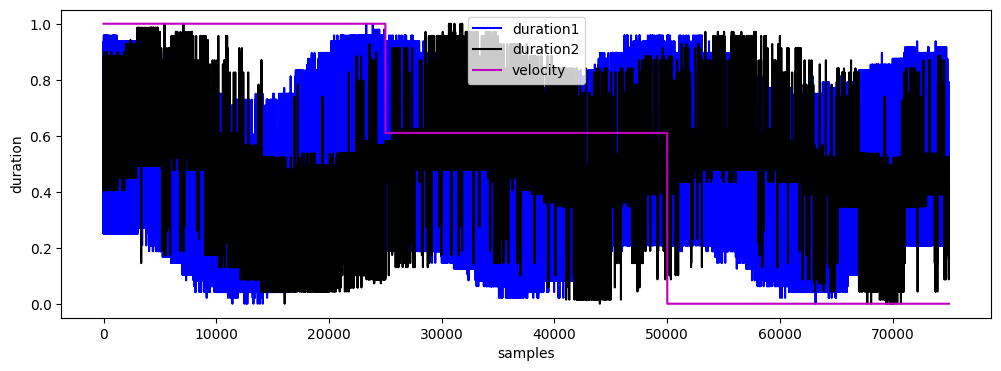

In [19]:
start = 0
stop = N
phase_plots(dnorms[:,0], dnorms[:,1], dnorms[:,3], start, stop)

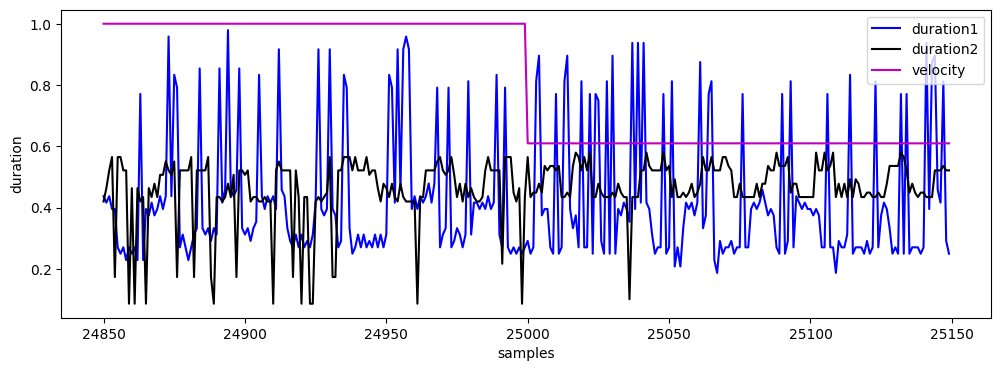

In [20]:
center = 25000
offset = 150
start = center-offset
stop = center+offset
phase_plots(dnorms[:,0], dnorms[:,1], dnorms[:,3], start, stop)

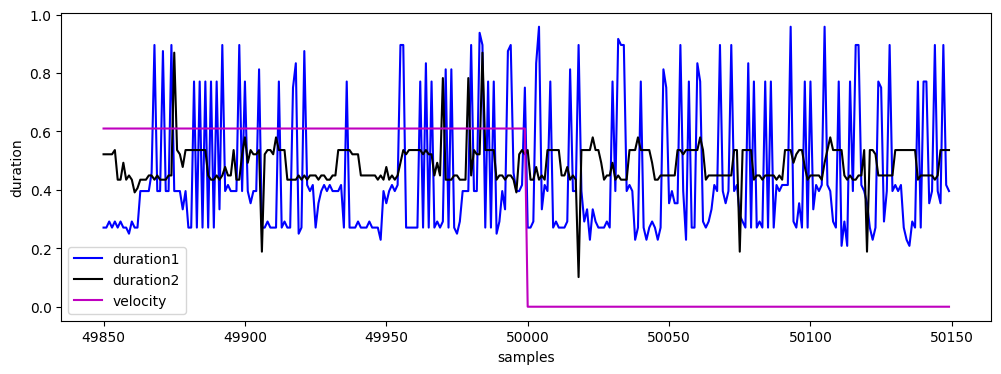

In [21]:
center = 50000
offset = 150
start = center-offset
stop = center+offset
phase_plots(dnorms[:,0], dnorms[:,1], dnorms[:,3], start, stop)

In [22]:
data.corr(method='spearman')

,duration1,duration2,temperature,Humidity,Direction,Velocity,delta
duration1,1.000000,-0.031308,-0.107249,0.221167,0.024808,-0.001337,0.755787
duration2,-0.031308,1.000000,-0.010481,0.142051,-0.509224,0.056722,-0.604427
temperature,-0.107249,-0.010481,1.000000,0.340958,-0.062549,-0.541012,-0.072251
Humidity,0.221167,0.142051,0.340958,1.000000,-0.272416,-0.612456,0.079702
Direction,0.024808,-0.509224,-0.062549,-0.272416,1.000000,0.000000,0.307166
Velocity,-0.001337,0.056722,-0.541012,-0.612456,0.000000,1.000000,-0.025099
delta,0.755787,-0.604427,-0.072251,0.079702,0.307166,-0.025099,1.000000


In [36]:
data["delta_avg"] = data["delta"].rolling(window=100).mean()

In [37]:
def feature_plot(feature, v, start, stop):
    plt.rcParams["figure.figsize"] = (12,4)
    plt.plot(indx[start:stop], feature[start:stop],c="k", label="delta_avg")
    plt.plot(indx[start:stop], v[start:stop],c="m", label="velocity")
    plt.xlabel("samples")
    plt.ylabel("feature and target")
    plt.legend()

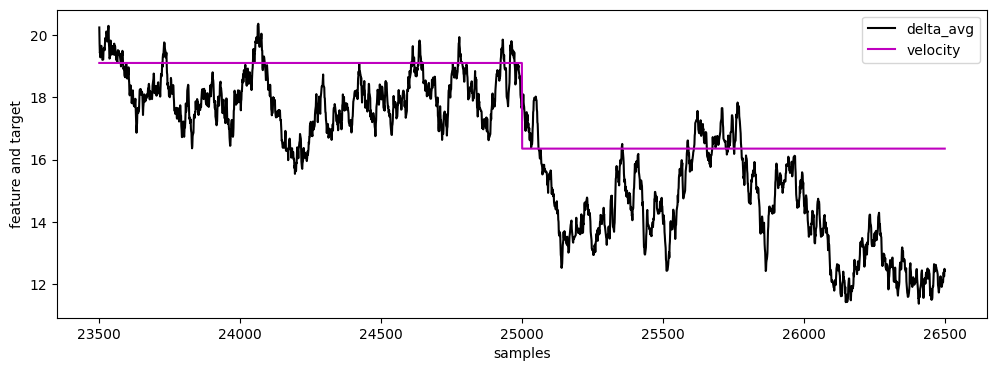

In [40]:
center = 25000
offset = 1500
start = center-offset
stop = center+offset
feature_plot(data["delta_avg"], v, start, stop)

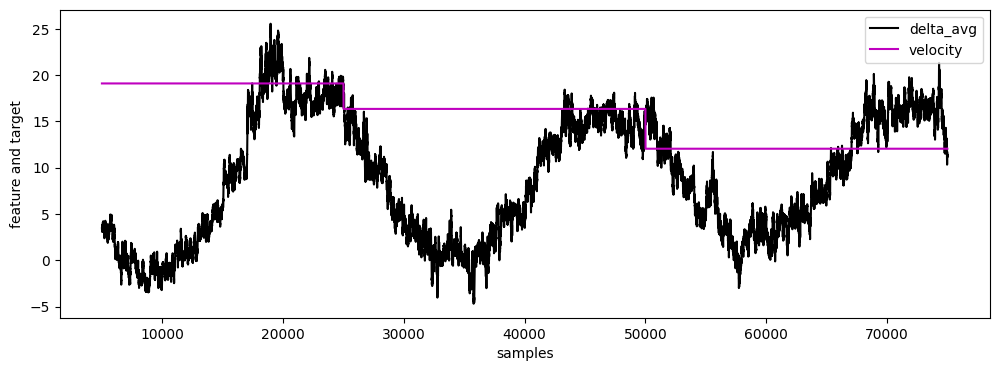

In [43]:
center = 50000
offset = 45000
start = center-offset
stop = center+offset
feature_plot(data["delta_avg"], v, start, stop)

## Observations
1. For a given wind velocity pattern between duration 1 and duration 2 changes w.r.t. direction/angle
2. Duration 1 and 2 are in different ranges. Hence it is best to do a min-max scaling
3. Number of unique fan speeds are currently three, increasing it might improve the result.